In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pickle

In [3]:
# Load the dataset
heart_data = pd.read_csv('C:/Users/Yukta/Desktop/desktop files/self_study/github/machine_learning_disease/Project2/Datasets/heart.csv')

# Print first 5 rows of the dataset
print(heart_data.head())


# Print last 5 rows of the dataset
print(heart_data.tail())

# Get the number of rows and columns in the dataset
print(heart_data.shape)

# Get some info about the data
print(heart_data.info())

# Check for missing values
print(heart_data.isnull().sum())

# Get statistical measures about the data
print(heart_data.describe())

# Check the distribution of Target Variable
print(heart_data['target'].value_counts())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
3

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

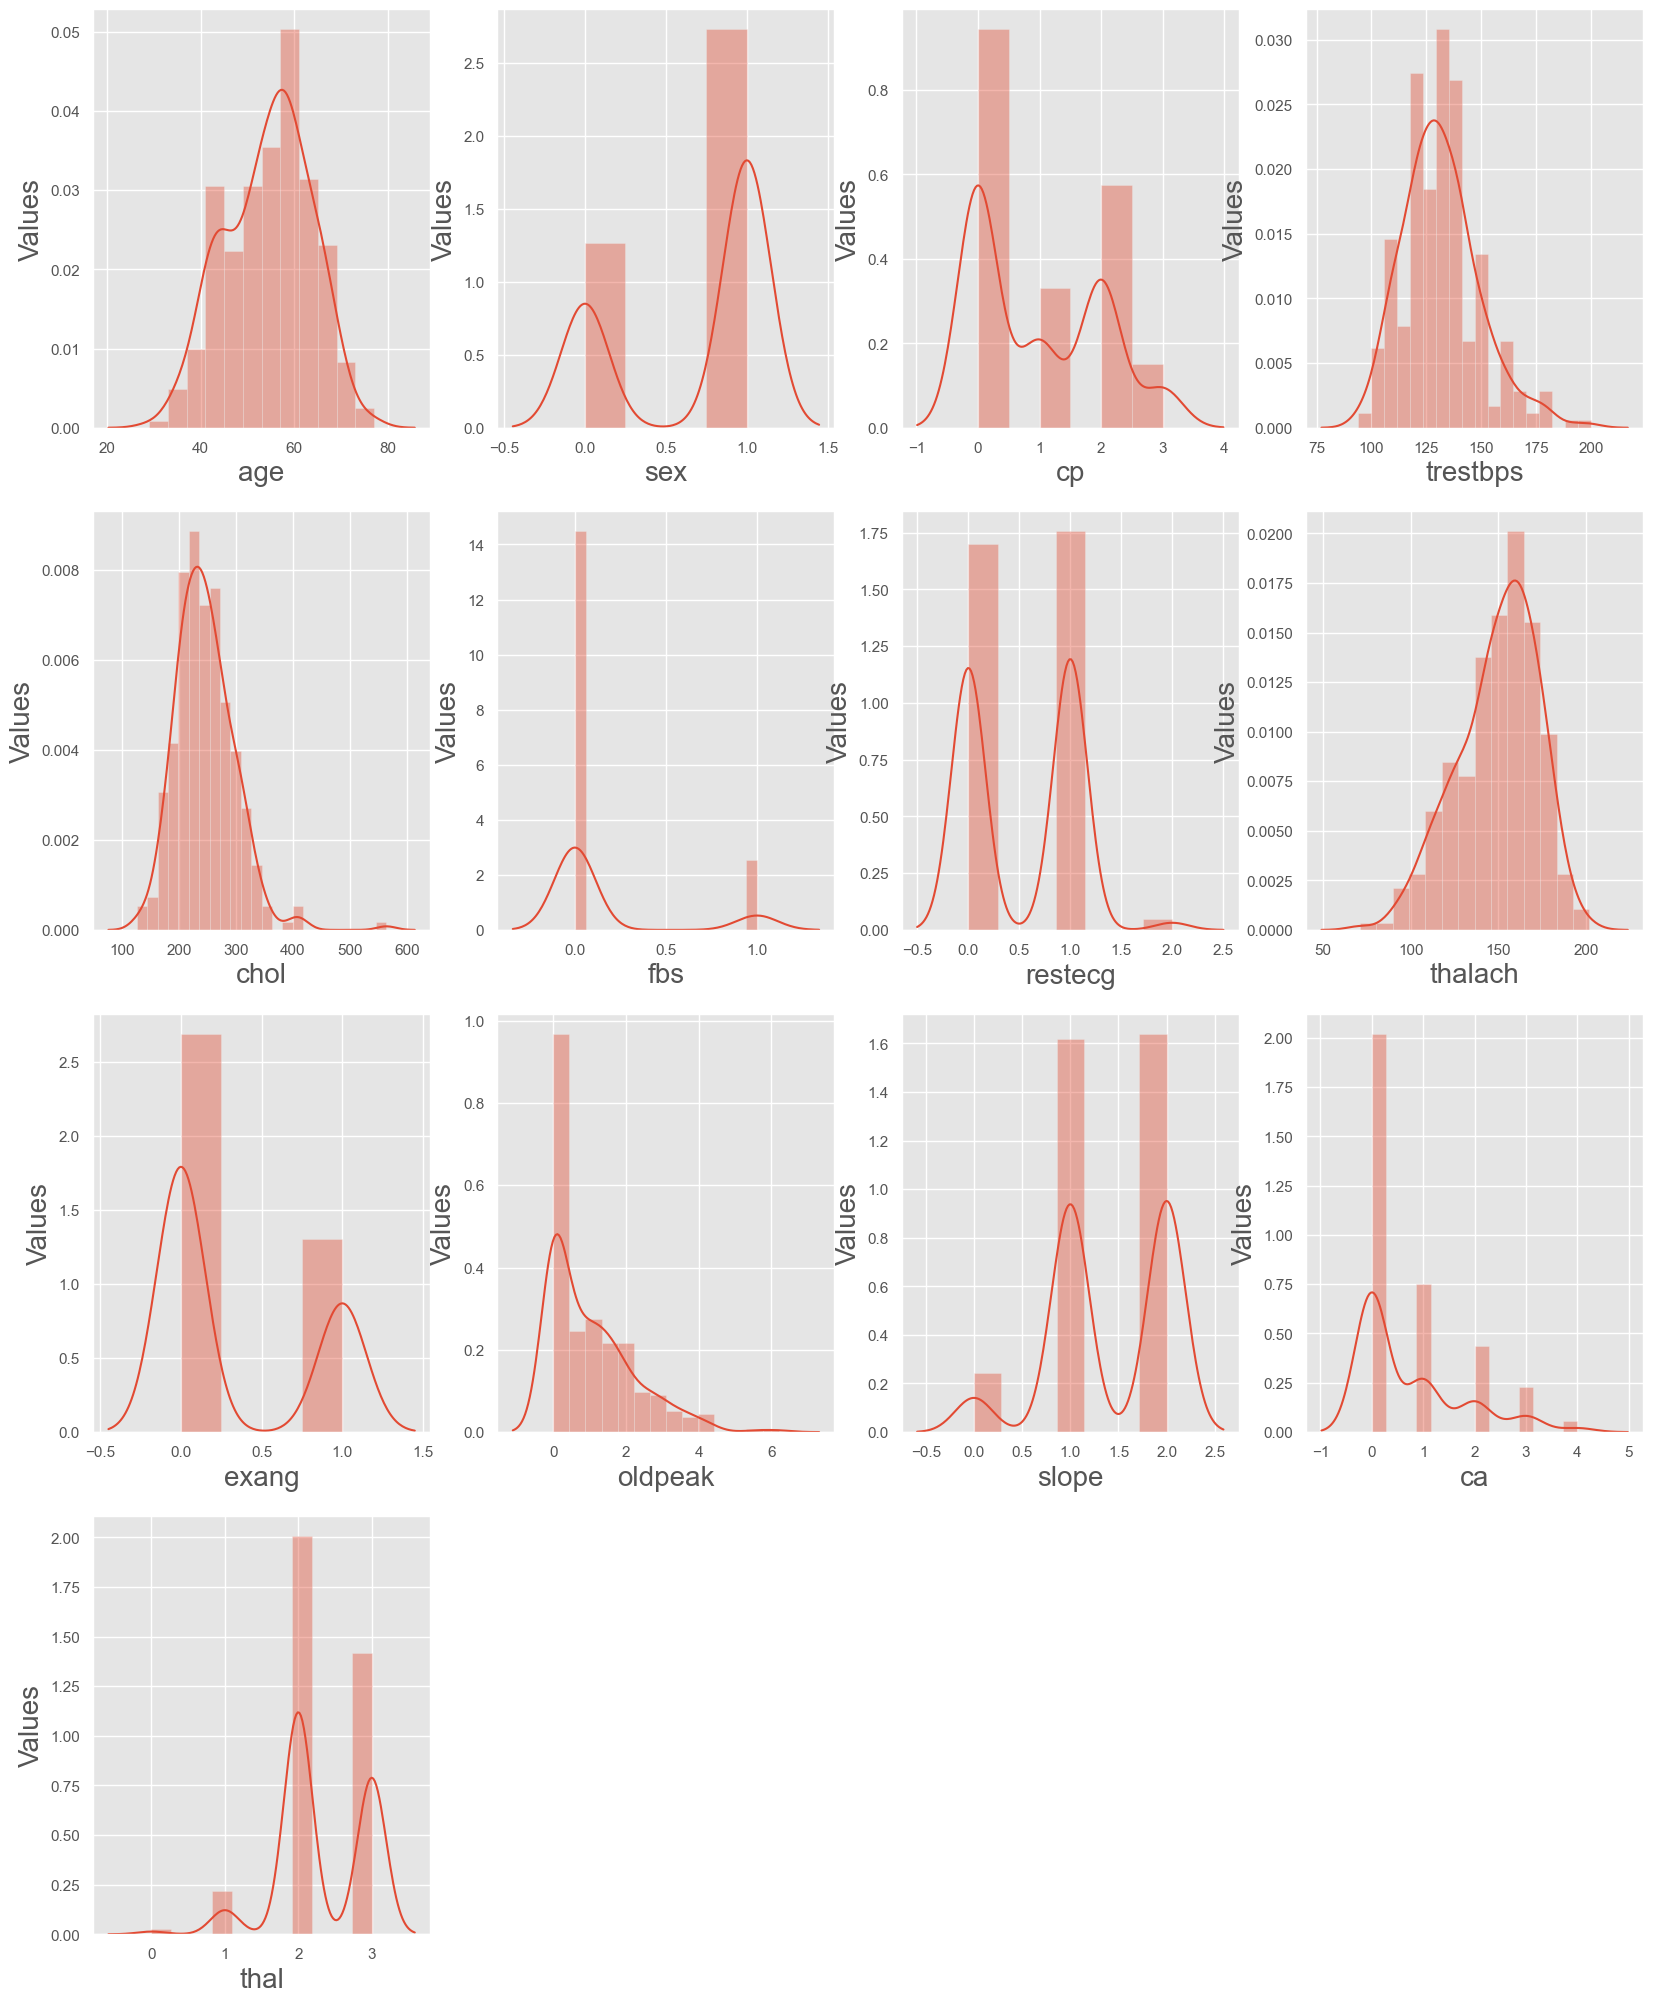

In [5]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_data:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

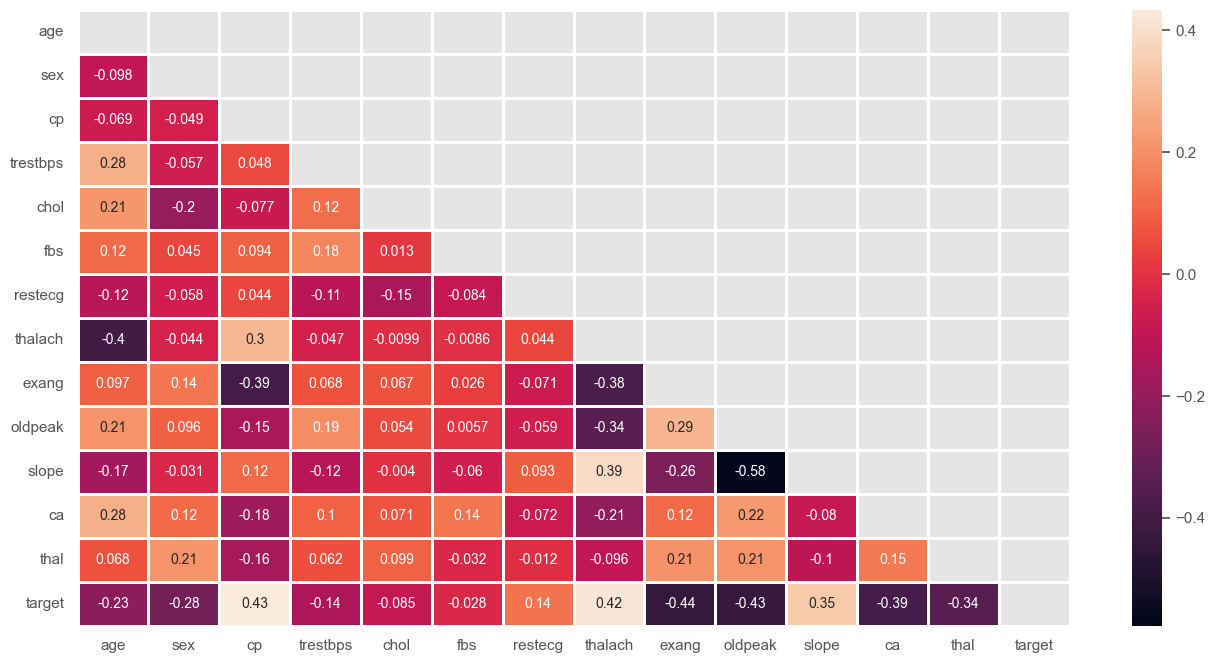

In [6]:
plt.figure(figsize = (16, 8))

corr = heart_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [7]:
#checking the variance
heart_data.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [8]:
#Standardize data or normalizae the data
heart_data['trestbps']=np.log(heart_data['trestbps'])
heart_data['chol']=np.log(heart_data['chol'])
heart_data['thalach']=np.log(heart_data['thalach'])

np.var(heart_data[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [9]:
# Split the features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [10]:
# Define the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [11]:
# Evaluate the model on the test data
Y_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy score on test data:', test_accuracy)
X_prediction= model.predict(X_train)
train_accuracy = accuracy_score(X_prediction, Y_train)
print('Accuracy score on train data:', train_accuracy)


Accuracy score on test data: 0.7704918032786885
Accuracy score on train data: 1.0


In [12]:
accuracies={}
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, Y_train)

y_pred2 = svc.predict(X_test)

acc2=accuracy_score(Y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, svc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 68.59504132231406 %
Testing accuracy score of the model is: 73.77049180327869 %


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'log_loss', n_estimators = 180)
gbc.fit(X_train, Y_train)

y_pred6 = gbc.predict(X_test)

acc6 = accuracy_score(Y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, gbc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 70.49180327868852 %


In [22]:
models = pd.DataFrame({
    'Model': ['XgBoost', 'SVM', 'Gradient Boosting'],
    'Score': [test_accuracy, acc2, acc6]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,XgBoost,0.770492
1,SVM,0.737705
2,Gradient Boosting,0.704918


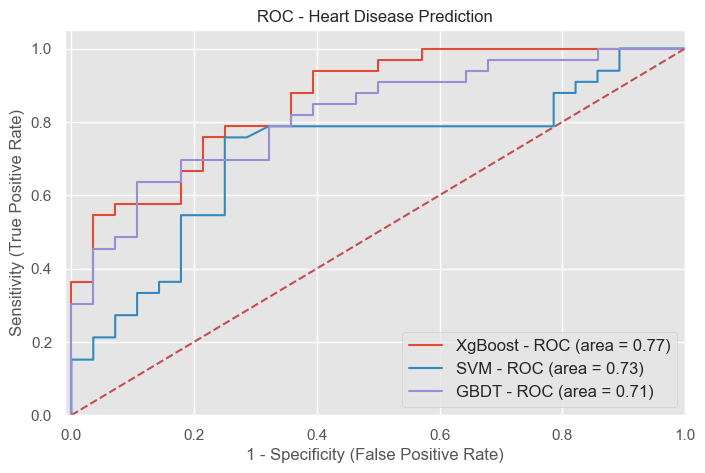

In [24]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'XgBoost',
    'model': model,
},
{
    'label': 'SVM',
    'model': svc,
},

{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [25]:
def predict_heart_disease(input_data):
    # Convert the input data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    # Reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    # Make prediction
    prediction = model.predict(input_data_reshaped)
    if prediction[0] == 0:
        print('The Person does not have a Heart Disease')
    else:
        print('The Person has Heart Disease')

# Test the predictive system
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
predict_heart_disease(input_data)


The Person does not have a Heart Disease


In [26]:
import pickle
filename = "heart_model_xgb.sav"
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open('heart_model_xgb.sav', 'rb'))

In [27]:
input_data = (55,0,1,132,342,0,1,166,0,1.2,2,0,2)
#change the input data to a numpy array

input_data_as_numpy_array =  np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
#print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Heart Disease")
else:
  print("The Person has Heart Disease")

The Person has Heart Disease
